## Regularization and model selection for Regression

The Gauss-Markov theorem states that the least squares estimate of the parameters $\beta$ in a linear regression model has the smallest mean square error (MSE) of all linear estimators with no bias. However, there can still be a biased estimator with smaller MSE. In such estimators, bias is traded in for a larger reduction in variance and hence lower MSE. Variable selection, regularization are some methods that are used to design such estimators.

___Subset selection___ is the process of identifying a reduced subset of predictors from the entire set of $p$ predictors to model the response, so that we may achieve lower variance in our estimators. The _Best Subset Selection_ method fits $\binom{p}{k}$ models for each $k = 1, 2 ... p$ and selects the best resulting model from among all the possibilities. _Stepwise Selection_ methods improve upon the computationally infeasible _Best Subset Selection_ by starting with a null (Forward Stepwise) or full (Backward Stepwise) model and adding (Forrward) or removing (Backward) predictors one step at a time in a greedy manner. Subset selection, therefore results in models with lower number of predictors, that are more interpretable and has lower prediction error. However, the process is still discrete - we either remove or add the variables, and hence have high variance. Regularization (aka Shrinkage) methods are a continuous versions of variable selection.

#### Regularization methods
In regularization methods, we fit the model with all $p$ variables, but shrink the coefficients towards zero, thereby reducing variance at the cost of slight increase in bias. In the least squares fitting algorithm, we estimated the parameters $\beta$ by minimizing the residual sum of squares (RSS):

\begin{align}
J(\beta) & = RSS \\
& = \sum_{i=1}^{n}(y_i - \hat y_i)^2 \\
& = \sum_{i=1}^{n}(y_i - \beta_0 - \sum_{j=1}^{p}\beta_jx_{ij})
\end{align}

In regularization methods, we add a shrinkage penalty term to the cost-function we are trying to minimize. For ___Ridge Regression___, the cost-function takes the form:

$$J(\beta) = \sum_{i=1}^{n}(y_i - \beta_0 - \sum_{j=1}^{p}\beta_jx_{ij}) + \lambda \sum_{j=1}^{p}\beta_j^2$$

And for ___Lasso Regression___:
$$J(\beta) = \sum_{i=1}^{n}(y_i - \beta_0 - \sum_{j=1}^{p}\beta_jx_{ij}) + \lambda \sum_{j=1}^{p}\lvert \beta_j \rvert$$

Where $\lambda \ge 0$, is the tuning parameter. As with least squares, $\beta$ are estimated so that RSS is as small as possible, however the choice of $\beta$ are penalized based on the shrinkage penalty term. In both Ridge and Lasso, the shrinkage term is small when $\beta$ are small, and hence this effectively has the effect of shrinking $\beta$ towards $0$. The tuning parameter $\lambda$ controls the impact of the penalty term on the regression model. When $\lambda = 0$, it is essentially the least squares estimate, and when $\lambda \to \infty$, the coefficient estimates will tend to zero. The addition of the shrinkage penalty term essentially reduces the flexibility of the model, thereby increasing bias, but decreasing variance. As $\lambda$ is increased, the fit will become poorer and at one point the bias is so high that the test MSE ends up becoming high as well.

The difference between Lasso and Ridge regression is the choice of penalty term. The lasso uses a $\ell_1$ penalty: the $\ell_1$ norm of the coefficient vector $\beta$ is the sum of its absolute values $\lVert \beta \rVert_1 = \sum \lvert \beta_j \rvert$. Ridge regression uses $\ell_2$ penalty, the norm of which is the Euclidean distance $\lVert \beta \rVert_2 = \sqrt{\sum_j \beta_j^2}$. While both penalty terms force the estimates to approach zero, the $\ell_2$ penalty encourages solutions where most parameters values are small, whereas the $\ell_1$ often results in solutions where parameters are exactly zero. So, Lasso regression performs something like subset selection, and hence produces more interpretable models.

Let's look at an example of Lasso and Ridge shrinkage methods. In the model below, we considerthe _Credit_ dataset, where we regress _Balance_ on other predictor variables like _Income_, _Limit_, _Age_, etc.

In [1]:
import numpy
import pandas

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import scale

In [2]:
credit = pandas.read_csv('../data/islr_data/credit.csv')
credit.drop('Unnamed: 0', axis=1, inplace=True)
credit.head(5)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
dummies = pandas.get_dummies(credit[['Gender', 'Student', 'Married', 'Ethnicity']])

y = credit.Balance.values
X_temp = credit.drop(['Balance', 'Gender', 'Student', 'Married', 'Ethnicity'], axis=1).astype('float64')
X = pandas.concat([X_temp, dummies], axis=1)
X.sample(5)

,Income,Limit,Rating,Cards,Age,Education,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
387,16.529,1357.0,126.0,3.0,62.0,9.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
24,10.742,1757.0,156.0,3.0,57.0,15.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
383,14.292,3274.0,282.0,9.0,64.0,9.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
176,24.050,2607.0,221.0,4.0,32.0,18.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
183,80.861,4090.0,335.0,3.0,29.0,15.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


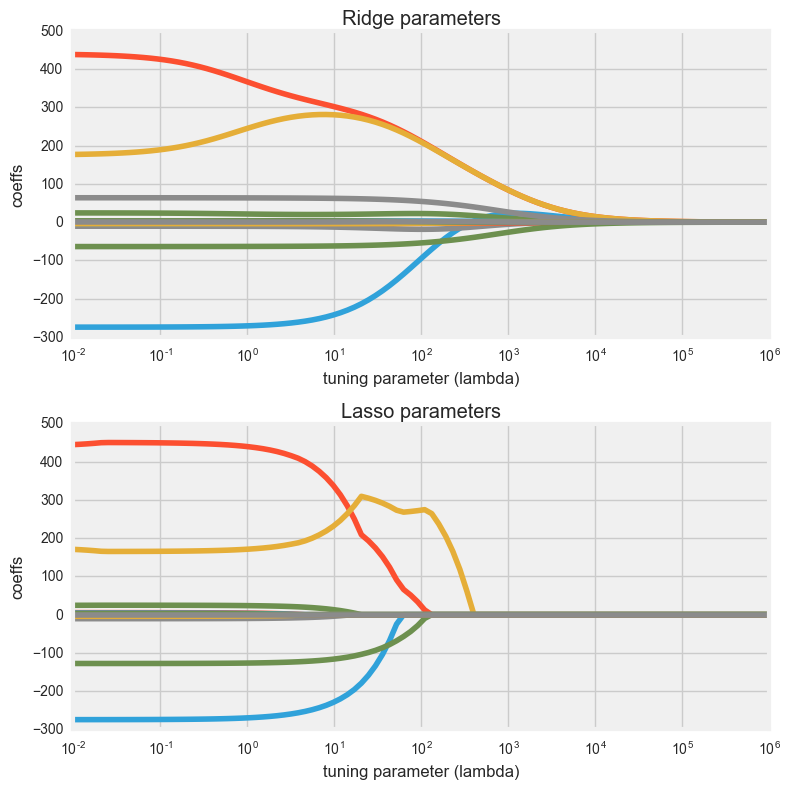

In [6]:
lambdas = 10**numpy.linspace(-2, 6, 100)
mparams_ridge = []
mparams_lasso = []

for l in lambdas:
    ridge = Ridge(alpha=l)
    ridge.fit(scale(X), y)
    mparams_ridge.append(ridge.coef_)
    lasso = Lasso(alpha=l)
    lasso.fit(scale(X), y)
    mparams_lasso.append(lasso.coef_)

fig, axes = plt.subplots(2, 1, figsize=(8, 8))

axes[0].plot(lambdas, mparams_ridge)
axes[0].set_xscale('log')
axes[0].set_xlabel('tuning parameter (lambda)')
axes[0].set_ylabel('coeffs')
axes[0].set_title('Ridge parameters')

axes[1].plot(lambdas, mparams_lasso)
axes[1].set_xscale('log')
axes[1].set_xlabel('tuning parameter (lambda)')
axes[1].set_ylabel('coeffs')
axes[1].set_title('Lasso parameters')
plt.tight_layout()

From the above plots, we can see that as $\lambda$ is increased, the coefficients shrink towards zero. We can also observe that the Lasso coefficients reach zero faster than the Ridge coefficients.